(chap-F)=
# Fourier transform


```{contents} Sections
:local:
:depth: 2
```

````{div} full-width

In this chapter, we will briefly review the Fourier transform of time dependent function and how we can numerically evaluate it applying the discrete Fourier transform to a regular sampling of the function over a finite time window. We will also discuss the expansion in Fourier series of periodic functions and how it consitute the link between the Fourier transform and its discrete counterpart.

````

## Introduction


```{div} full-width

The Fourier transform of a function in the time domain $f(t)$ is defined as

$$
\begin{align}
\tilde{f}(\omega) &= \int_{-\infty}^\infty f(t)\,e^{-i\,\omega\,t}\,\mathrm{d} t &
\end{align}
$$ (T1:1)

Here $t$ is the time, $\omega=2\,\pi\,f$ is the angular frequency (with $f$ being the frequency), $i$ is the imaginary unit and the tilde $\sim$ stands for the Fourier transform.

We can also define the inverse Fourier transform

$$
f(t)  = \frac{1}{2\,\pi} \int_{-\infty}^\infty \tilde{f}(\omega)\,e^{i\,\omega\,t}\,\mathrm{d} \omega
$$ (T1:2)

which yields the function in the time domain $f(t)$ starting from its Fourier transform $\tilde{f}(\omega)$.  

Eq. {eq}`T1:2` allows us to see the function in the time domain as the superimposition of monochromaic signals (with given frequencies) where the Fourier transform provides the weight of each monochromatic signal.

```

```{admonition} Dirac delta function
:class: note, full-width

Let us consider the Dirac delta function in the time domain $\delta(t)$ introduced in {numref}`Appendix %s <chap-dirac-delta>` {ref}`chap-dirac-delta`. Its Fourier transform

$$
\tilde{\delta}(\omega) = \int_{-\infty}^\infty \delta(t)\,e^{-i\,\omega\,t}\,\mathrm{d} t = 1
$$ (T1:3)

From eq. {eq}`T1:2`, we obtain

$$
\delta(t) = \frac{1}{2\,\pi}\,\int_{-\infty}^\infty \tilde{\delta}(\omega)\,e^{i\,\omega\,t}\,\mathrm{d} \omega = \frac{1}{2\,\pi}\,\int_{-\infty}^\infty e^{i\,\omega\,t}\,\mathrm{d} \omega
$$ (T1:4)

which can be generalized with a shift in time as follows

$$
\delta(t-\tau) = \frac{1}{2\,\pi}\,\int_{-\infty}^\infty e^{i\,\omega\,(t-\tau)}\,\mathrm{d} \omega
$$ (T1:5)

By reversing the role of $\omega$ and $t$ and substitutìng $\tau\rightarrow\omega_g$, we can also write

$$
\delta(\omega-\omega_g) = \frac{1}{2\,\pi}\,\int_{-\infty}^\infty e^{i\,(\omega-\omega_g)\,t}\,\mathrm{d} t
$$ (T1:5bis)

Eqs. {eq}`T1:5` and {eq}`T1:5bis` are useful identities that we shall use in evaluating the Fourier transform of monochromatic signals. 

```

```{admonition} Box function
:class: note, full-width

Let us consider the box function  $B_T(t)$ in the time interval $[0,T)$ 

$$
B_T(t) = H(t)-H(t-T) =\begin{cases} 1 & t\in[0,T) \\ 0 & t\notin [0,T)
\end{cases}
$$ (T1:6)

with $H$ being the Heaviside step function

$$
H(x) = \begin{cases} 1 & x \geq 0 \\ 0 & x<0 \end{cases}
$$ (T1:7)

Its Fourier transform reads

$$
\begin{align}
\tilde{B}_T(\omega) &= \int_{-\infty}^\infty B_T(t)\,e^{-i\,\omega\,t}\,\mathrm{d} t = \int_0^T e^{-i\,\omega\,t}\,\mathrm{d} t = \left.\frac{e^{-i\,\omega\,t}}{-i\,\omega}\right|_0^T = \frac{1-e^{-i\,\omega\,T}}{i\,\omega}
\end{align}
$$ (T1:8)

```



```{caution} 
:class: full-width

Despite the denominator in eq. {eq}`T1:8`, $\tilde{B}(\omega)$ is continuous at $\omega=0$ as shown hereinafter

$$
\begin{align}
& \lim_{\omega \rightarrow 0} \tilde{B}_T(\omega) = \lim_{\omega \rightarrow 0} \frac{1-(1-i\,\omega\,T)}{i\,\omega} = T
\end{align}
$$ (T1:9)

In order to avoid any numerical issue in evaluating this Fourier transform at $\omega=0$, it is convinient to implement the following form

$$
\begin{align}
\tilde{B}_T(\omega) &= e^{-i \frac{\omega\,T}{2}}\,\frac{e^{i \frac{\omega\,T}{2}}-e^{-i \frac{\omega\,T}{2}}}{i\,\omega} = e^{-i \frac{\omega\,T}{2}}\, \frac{2\,\sin\big(\frac{\omega\,T}{2}\big)}{\omega} = T\,e^{-i\,\frac{\omega\,T}{2}}\,J\big(\tfrac{\omega\,T}{2}\big)
\end{align} 
$$ (T1:10)

where $J$ is the spherical Bessel function of the first kind and order 0

$$
J(x) = \frac{\sin(x)}{x}
$$ (T1:11)

``` 

<font size="4"> Exercise </font>

```{div} full-width

Let us consider the Box function and its Fourier transform, eqs. {eq}`T1:6` and {eq}`T1:10`


**Tasks:**

1. Make a Python function for the Box function $B_T(t)$ and plot it
1. Make a Python function for the 0-order spherical Bessel function $j_n(x)$ and make sure that you can evaluate at $x=0$
1. Make a Python function for the Fourier transform of the Box function $\tilde{B}_T(t)$ and plot it
```

```{div} full-width
**Solution 1**

Let us implement the Box function
```

In [7]:
import numpy as np

def eva_box(ts, T=1):
    
    box = np.ones(ts.shape)
    box[ts<0]  = 0
    box[ts>=T] = 0
    
    return box

```{div} full-width
and plot it
```

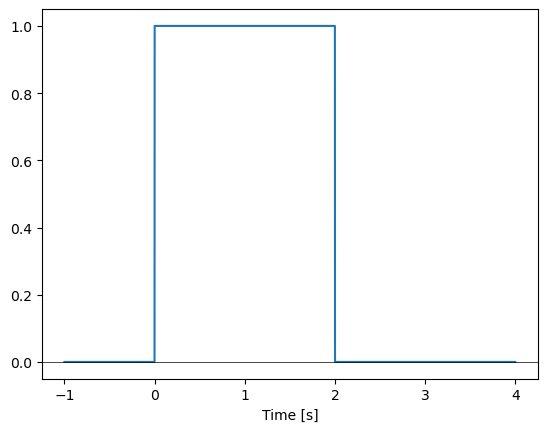

In [19]:
T = 2
ts = np.linspace(-T/2,2*T,10001)
box = eva_box(ts,T)

import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.set_xlabel("Time [s]");
ax.plot(ts,box);

ax.axhline(0,linewidth=0.5,color="black");

```{div} full-width
**Solution 2**
```

```{div} full-width

Let us import the function `spherical_jn` from the module `scipy.special` and make a lambda function setting to zero the order $n$ (that is the first argument of the function `spherical_jn`)

```

In [20]:
from scipy.special import spherical_jn
J = lambda x: spherical_jn(0,x)
print(J(0))

1.0


```{div} full-width
**Solution 3**

Let us implement the Fourier transform of the box function and plot it
```

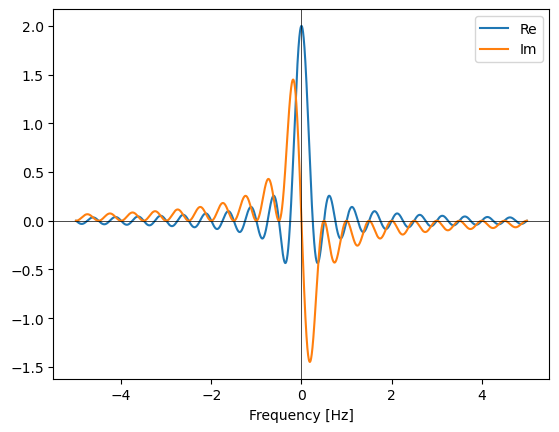

In [21]:
#########################################################################
def eva_FT_box(fs, T=1):
    
    ws = 2*np.pi*fs
    xs = ws*T/2
    FT_box = T * np.exp(-1j*xs) * J(xs)
    
    return FT_box
#########################################################################

fs = np.linspace(-10/T,10/T,10001)
FT_box = eva_FT_box(fs,T)

fig,ax = plt.subplots()
ax.set_xlabel("Frequency [Hz]");
ax.plot(fs,FT_box.real,label="Re");
ax.plot(fs,FT_box.imag,label="Im");
ax.legend()

ax.axhline(0,linewidth=0.5,color="black");
ax.axvline(0,linewidth=0.5,color="black");

```{div} full-width

We note that the Fourier transform is a complex function and, so, we plot both its real and imaginary parts. Also, we can see that the real part is symmetric with respect to the origin, while the imaginary part is antisymmetric. This is because the box function is a real function. 

The functions `eva_box`, `eva_FT_box` and `J` are also implemented in the `theory` module.

```

## Properties of the Fourier transform

```{div} full-width

Hereinafter we list the main properties of the Fourier transform

```

### Shift in time

```{div} full-width

The Fourier transform of a function shifted in time $f(t+t_0)$ yields the Fourier transform $\tilde{f}(\omega)$ multiplied by $e^{i\,\omega\,t_0}$

$$
\begin{align}
\int_{-\infty}^\infty f(t+t_0)\,e^{-i\,\omega\,t}\,\mathrm{d}t 
= e^{i\,\omega\,t_0}\,\tilde{f}(\omega)
\end{align}
$$ (T1:12)

```

### Derivatives

```{div} full-width

The Fourier transform of a $n$-th order time derivative of a function $f(t)$ yields the Fourier transform $\tilde{f}(\omega)$ multiplied by $(i\,\omega)^n$

$$
\begin{align}
\int_{-\infty}^\infty \frac{\mathrm{d}^n f(t)}{\mathrm{d} t^n}\,e^{-i\,\omega\,t}\,\mathrm{d}t = (i\,\omega)^n\,\tilde{f}(\omega)
\end{align}
$$ (T1:13)

```

### Convolution

```{div} full-width

The Fourier transform of the convolution between two functions $f(t)$ and $g(t)$ 

$$
h(t) = \int_{-\infty}^\infty f(\tau)\,g(t-\tau)\,\mathrm{d}\tau 
$$ (T1:14)

yields the product of the two Fourier transforms $\tilde{f}(\omega)$ and $\tilde{g}(\omega)$ 

$$
\begin{align}
\int_{-\infty}^\infty h(t)\,e^{-i\,\omega\,t}\,\mathrm{d}t = \tilde{f}(\omega)\,\tilde{g}(\omega)
\end{align}
$$ (T1:15)

```

### Real functions

```{div} full-width

The Fourier transform of a real function $f(t)$ has the following property

$$
\tilde{f}^*(\omega) = \tilde{f}(-\omega)
$$ (T1:16)

We thus can write its inverse Fourier transform as follows

$$
f(t) = \frac{1}{\pi}\,\Re\left[\int_0^\infty \tilde{f}(\omega)\,e^{i\,\omega\,t}\right]\,\mathrm{d} \omega = \frac{1}{\pi}\,\int_0^\infty \Big(\Re\big[\tilde{f}(\omega)\big]\,\cos(\omega\,t) - \Im\big[\tilde{f}(\omega)\big]\,\sin(\omega\,t) \Big)\,\mathrm{d} \omega
$$ (T1:17)

where $\Re$ and $\Im$ are the operators which returns the real and imaginary parts.

---

```

## Application to the harmonic oscillator

```{div} full-width

After Fourier transform and making use of eq. {eq}`T1:13`, the differential equation governing the harmonic oscillator, eq. {eq}`H0:6`, becomes

$$
\big(-\omega^2+2\,i\,\omega\,\lambda+\omega_0^2\big)\,\tilde{z}(\omega) = \omega^2\,\tilde{u}(\omega)
$$ (T1:18)

```

### Green function

```{div} full-width


It can be solved for the Fourier transform of the relative motion $\tilde{z}$  and cast in the following form

$$
\tilde{z}(\omega) = \tilde{G}(\omega)\,\big(-\omega^2\,\tilde{u}(\omega)\big)
$$ (T1:19)

with 

$$
\tilde{G}(\omega) = -\frac{1}{\omega_0^2-\omega^2+2\,i\,\omega\,\lambda}
$$ (T1:20)

In view of eqs. {eq}`H0:28` and {eq}`T1:15`, we can understand that $\tilde{G}$ is the Fourier transform of the Green function of the harmonic oscilator, eq. {eq}`H0:35bis`, that we rewrite here as follows

$$
\begin{align}
G(t) 
&= -\frac{\sin(\omega_d\,t)\,e^{-\lambda\,t}}{\omega_d}\,H(t) 
= \frac{e^{\gamma_-\,t}-e^{\gamma_+\,t}}{2\,i\,\omega_d}\,H(t) 
\end{align}
$$  (T1:21)

We can verify this remark by evaluating the Fourier transform

$$
\begin{align}
\tilde{G}(\omega) &= \int_{-\infty}^\infty G(t)\,e^{-i\,\omega\,t}\,dt = \frac{1}{2\,i\,\omega_d}\,\int_0^\infty \left(e^{(\gamma_--i\,\omega)\,t}-e^{(\gamma_+-i\,\omega)\,t}\right)\,d t  = \frac{1}{2\,i\,\omega_d}\,\left.\left(\frac{e^{(\gamma_--i\,\omega)\,t}}{\gamma_--i\,\omega}-\frac{e^{(\gamma_+-i\,\omega)\,t}}{\gamma_+-i\,\omega}\right)\right|_0^\infty 
\\
&= \frac{1}{2\,i\,\omega_d}\,\left(\frac{1}{\gamma_+-i\,\omega}-\frac{1}{\gamma_--i\,\omega}\right)
= \frac{1}{2\,i\,\omega_d}\,\left(\frac{\gamma_- - \gamma_+}{(\gamma_+-i\,\omega)\,(\gamma_--i\,\omega)}\right) = -\frac{1}{\omega_0^2-\omega^2+2\,i\,\omega\,\lambda}
\end{align}
$$  (T1:22)

where we make use of the following identities

$$
\begin{align}
& \lim_{t\rightarrow \infty} e^{(\gamma_\pm-i\,\omega)\,t} = 0 
\\
&\gamma_- - \gamma_+ = -2\,i\,\omega_d
\\
&(\gamma_+-i\,\omega)\,(\gamma_+-i\,\omega) = \omega_0^2-\omega^2+2\,\,i\,\omega\,\lambda
\end{align}
$$  (T1:23)

```

### Response function

```{div} full-width

Similar, by rewriting eq. {eq}`T1:18` as follows

$$
\tilde{z}(\omega) = \tilde{R}(\omega)\,\tilde{u}(\omega)
$$  (T1:24)

with 

$$
\tilde{R}(\omega) = \frac{\omega^2}{\omega_0^2-\omega^2+2\,i\,\omega\,\lambda}
$$  (T1:25)

we can understand that $\tilde{R}$ is the Fourier transform of the response function of the harmonic oscillator, eq. {eq}`H0:37`.


```

### Amplitude factor and phase

```{div} full-width

Let us recast eq. {eq}`T1:25` in the exponential form as follows

$$
\tilde{R}(\omega) = \rho(\omega)\,e^{i\,\phi(\omega)}
$$  (T1:26)

where the module $\rho$ and the phase $\beta$ are given by

$$
\rho(\omega)= \frac{\omega^2}{D}
 \qquad \cos\phi(\omega) = \frac{\omega_0^2-\omega^2}{D} \qquad \sin\phi(\omega) = \frac{-2\,\omega\,\lambda}{D}
$$  (T1:27)

with $D$, as in eq. {eq}`H0:51`, given by 

$$
D = \sqrt{\big(\omega_0^2-\omega^2\big)^2+\big(2\,\omega\,\lambda\big)^2}
$$  (T1:28)

We note that the module $\rho$ is symmetric while $\beta$ is antisimmetric with respect to $\omega$

$$
\rho(-\omega) = \rho(\omega)
\qquad \beta(-\omega) = -\beta(\omega) 
$$  (T1:29)

Also, we note that they correspond to the amplitude factor and phase already obtained in eqs. {eq}`H0:51` and {eq}`H0:53` when the angular frequency $\omega$ is regarded as the ground angular frequency $\omega_g$. We will the reason of this correspondence in the next subsection. 


Before, let us implement in python the Fourier transform of the Green and response functions

```

In [22]:
from theory import eva_FT_green, eva_FT_response

help(eva_FT_green)
help(eva_FT_response)

Help on function eva_FT_green in module theory:

eva_FT_green(f, natural_period=1, damping_ratio=0.1)
    
    Return the green function in the frequency domain evaluated 
    at the frequency (or frequencies) `f` for the harmonic oscillator 
    with given natural period and damping ratio

Help on function eva_FT_response in module theory:

eva_FT_response(f, natural_period=1, damping_ratio=0.1)
    
    Return the response function in the frequency domain evaluated 
    at the frequency (or frequencies) `f` for the harmonic oscillator 
    with given natural period and damping ratio



```{div} full-width

and plot their module and phase

```

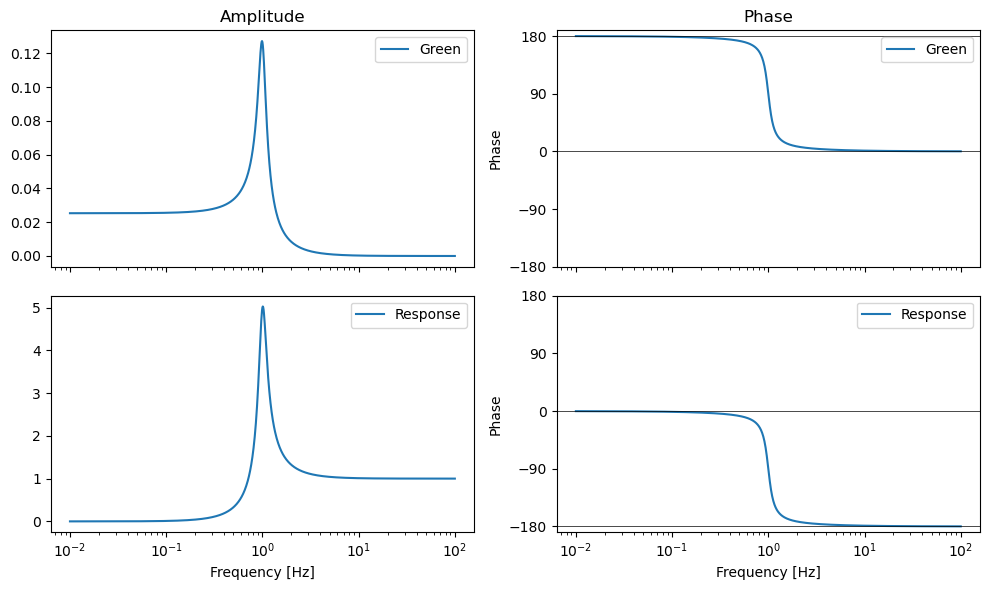

In [6]:
fs = 1e1**np.linspace(-2,2,1001)
FT_green = eva_FT_green(fs)
FT_response = eva_FT_response(fs)

fig,axes = plt.subplots(2,2,tight_layout=True,figsize=(10,6),sharex=True)
axes[0,0].semilogx(fs,abs(FT_green),label="Green")
axes[0,1].semilogx(fs,np.angle(FT_green,deg=True),label="Green")
axes[1,0].semilogx(fs,abs(FT_response),label="Response")
axes[1,1].semilogx(fs,np.angle(FT_response,deg=True),label="Response")

options = dict(color="black",linewidth=0.5)

axes[0,0].set_title("Amplitude")
axes[0,1].set_title("Phase")
for ax in axes[:,1]:
    ax.set_ylabel("Phase")
    ax.set_yticks([-180,-90,0,90,180])
    ax.axhline(-180,**options)
    ax.axhline(180,**options)
    ax.axhline(0,**options)
for ax in axes[1]:
    ax.set_xlabel("Frequency [Hz]")
for ax in axes.flatten():
    ax.legend()

```{div} full-width
The Fourier transform of the response function describes how the relative motion of the mass is related to the
ground motion for each frequency. In particular, it provides the ratio
between the Fourier transform of the relative displacement, $\tilde{z}$,
and that of the ground displacement, $\tilde{u}_g$. We
note that, for high frequencies, in the limit for
$\omega\rightarrow\infty$, the frequency response function goes to
$-1$, meaning that $\tilde{z}(\omega) = -\tilde{u}(\omega)$.
This means that the relative
displacement of the mass is opposite (a phase shift of $-\pi$) to a high frequency ground motion, so
that the mass is at rest in the inertial reference frame. On the
contrary, for low frequency ground motion, in the limit for
$\omega\rightarrow 0$, there is no relative motion and, so, the
mass simply follows the ground motion. At the resonance frequency,
instead, the push from the ground occurs when the mass is at top or
bottom position (the amplitude of which depends on the damping ratio,
$\xi$) and there is a phase shift of $-\pi/2$ (like when
we push a swing at the right time).
```

### Sinusoidal ground motion

```{div} full-width

In order to undrestand the reason of this correspondence, let us consider the differential equation for the steady-state relatiev motion already discussed in the time domain, eq. {eq}`H0:42`, that we rewrite here


$$
\ddot{z}_p(t)+2\,\lambda\,\dot{z}_p(t)+\omega_0\,z_\mathrm{p}(t) = -g(t)
$$ (T1:30)

with $g$ being the ground acceleration that we recast as follows

$$
g(t) = A_g\,\sin(\omega_g\,t+\phi_g) = A_g\,\frac{e^{i\,\omega_g\,t+i\,\phi_g} - e^{-i\,\omega_g\,t-i\,\phi_g}}{2\,i}
$$  (T1:31)

Its Fourier transform yields

$$
\tilde{g}(\omega) = \int_{-\infty}^\infty g(t)\,e^{-i\,\omega\,t}\,d t = \frac{A_g}{2\,i}\,\int_{-\infty}^\infty \left(e^{i\,(\omega_g-\omega)\,t+i\,\phi_g} - e^{-i\,(\omega_g+\omega)\,t-i\,\phi_g}\right)\,dt = \frac{\pi\,A_g}{i}\,\left(\delta(\omega-\omega_g)\,e^{i\,\phi_g}-\delta(\omega+\omega_g)\,e^{-i\,\phi_g}\right)
$$  (T1:32)

It is noteworthy that it is characterized only by the frequency $\omega=\pm\omega_g$ and this is due to the fact that it is a monocromatic signal with angular frequency $\omega_g$.

Let us now consider the Fourier transform of the relative acceleration and write it as the product of the Fourier transform of the response function and of the ground acceleration

$$
-\omega^2\,\tilde{z}_p(\omega) = \tilde{R}(\omega)\,\tilde{g}(\omega) = \frac{\pi\,A_g}{i}\,\left(\delta(\omega-\omega_g)\,e^{i\,\phi_g}-\delta(\omega+\omega_g)\,e^{-i\,\phi_g}\right)\,\tilde{R}(\omega)
$$  (T1:33)

and take its inverse Fourier transform

$$
\begin{align}
\ddot{z}_p(t) &= \frac{1}{2\,\pi}\,\int_{-\infty}^\infty \big(-\omega^2\,\tilde{z}_p(\omega)\big)\,e^{i\,\omega\,t}\,d \omega = \frac{A_g}{2\,i}\,\int_{-\infty}^\infty \left(\delta(\omega-\omega_g)\,e^{i\,\phi_g}-\delta(\omega+\omega_g)\,e^{-i\,\phi_g}\right)\,\tilde{R}(\omega)\,e^{i\,\omega\,t}\,d \omega 
\\
&= \frac{A_g}{2\,i}\,\left(R(\omega_g)\,e^{i\,(\omega_g\,t+\phi_g)}-R(-\omega_g)\,e^{-i\,(\omega_g\,t+\phi_g)}\right) = \frac{A_g}{2\,i}\,\rho(\omega_g)\,\left(e^{i\,(\omega_g\,t+\phi_g+\phi(\omega_g))}-e^{-i\,(\omega_g\,t+\phi_g+\phi(\omega_g))}\right) \\
&= A_g\,\rho(\omega_g)\,\sin\big(\omega_g\,t+\phi_g+\phi(\omega_g)\big)
\end{align}
$$  (T1:34)

This result coincides with the solution given by eq. {eq}`H0:48` and derived in the time domain just because $\rho(\omega_g)$ and $\phi(\omega_g)$ coincides with the amplitude factor and phase, eqs. {eq}`H0:51` and {eq}`H0:53`. It also shows how the Fourier transform provides an alternative method for solving differential equations.

```

<p style="page-break-after:always;"></p>